In [ ]:
plt.rcParams.update({'font.size': 12})

In [ ]:
import torch
import matplotlib.pyplot as plt
import ESN
import time
import numpy as np
torch.set_default_device("cuda:0")
torch.set_default_dtype(torch.double)
# Parameters
Two,Ttrain = 2000,100000
N = 200
C = 0.98
dim = 5
N_d = int(N * dim)
maxtau = int(N_d / dim * 2)
maxtau = int(N_d *1.5)
maxtau = int(N_d *1.2)
taus = np.arange(1,maxtau)

torch.manual_seed(0)
u_sym = torch.normal(0,1,size = (dim, Two + Ttrain)).to("cuda:0")

#
randomizer = torch.arange(1,dim+1)
#randomizer = torch.rand(dim)*dim + 1
#randomizer = torch.sort(randomizer)[0]

for i in range(dim):
    u_sym[i] = u_sym[i]*torch.sqrt(randomizer[i])

    
    
esn = ESN.ESN_mult(N_d, uC=C, dim=dim,idWin=True)

st = time.time()
Xwo = esn.run_washout(u_sym, Two, actf="identity")
print("runtime :",time.time()-st)

st = time.time()
#mfs = ESN.MCwithPI_general(u_sym, Xwo, maxtau)
#mfs = ESN.MCwithPI_general_newsur(u_sym, Xwo, maxtau,sur_sets=1)
#mfs = ESN.MC_cSVD_old(u_sym, Xwo, maxtau)
#mfs,sur_val = ESN.MC_cSVD(u_sym, Xwo, maxtau,ret_sur=True)
raw_res,lin,rev,sur_val = ESN.MC_cSVD(u_sym, Xwo, maxtau,ret_all=True)
mfs = rev

mc_tau=torch.sum(mfs,0).cpu().numpy()

print("calc time :",time.time()-st)


totMC = torch.sum(mfs).cpu().numpy()

#colors = ["r", "g", "b", "c", "m", "y","pink","lime"]
print(f"totMC:{totMC}\nsurrogate value: {sur_val.cpu().numpy()}")
#print(f"totMC:{totMC}")

runtime : 4.770619869232178
calc time : 3.483827590942383
totMC:997.5977066758262
surrogate value: [0.01000139 0.01000357 0.00999869 0.00999795 0.01001707]


In [31]:
vars = torch.var(u_sym,1)
S_var = torch.sum(vars)
scaled_mfs = mfs/vars.unsqueeze(1)*S_var

tensor(14.9416, device='cuda:0')


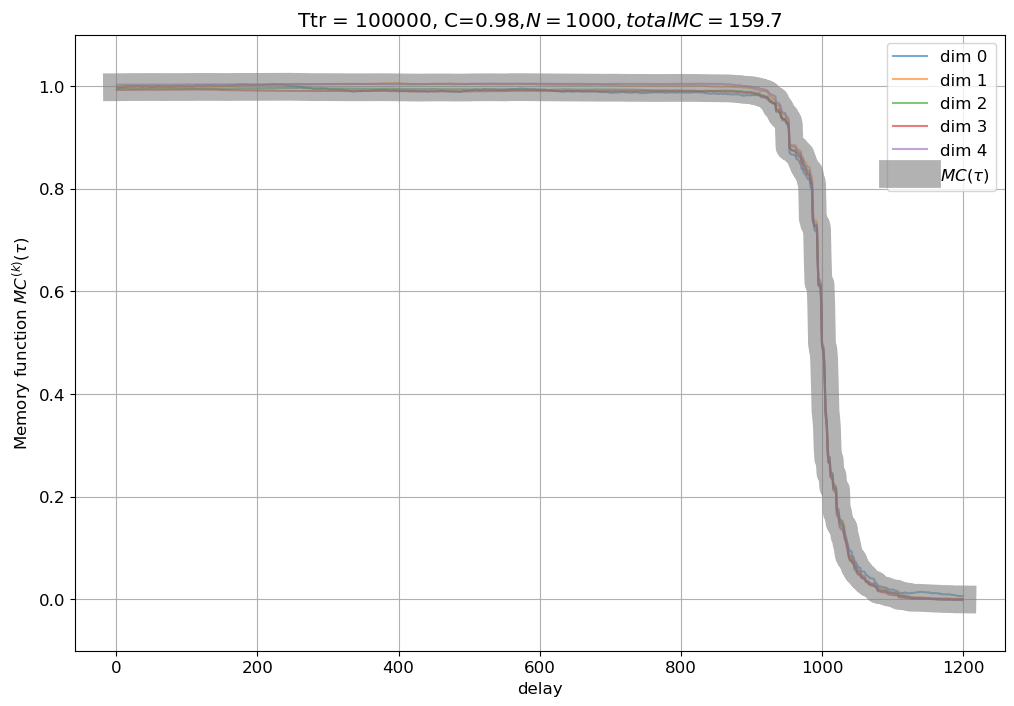

In [46]:


fig,ax = plt.subplots(figsize=(12,8))
for d in range(dim):
    plt.plot(taus,scaled_mfs[d].cpu().numpy(),alpha=0.6,label="dim "+str(d))

plt.plot(taus,mc_tau,alpha=0.6,label=r"$MC(\tau)$",linewidth=20,color="grey")

plt.ylim(-0.1,1.1)
plt.xlabel("delay")
plt.ylabel(r'Memory function $MC^{(k)}(\tau)$')
plt.title(r'Ttr = %d, C=%.2f,$N=%d, totalMC=%.1f$'%(Ttrain,C,N_d,totMC))
#
plt.legend()
plt.grid(True)

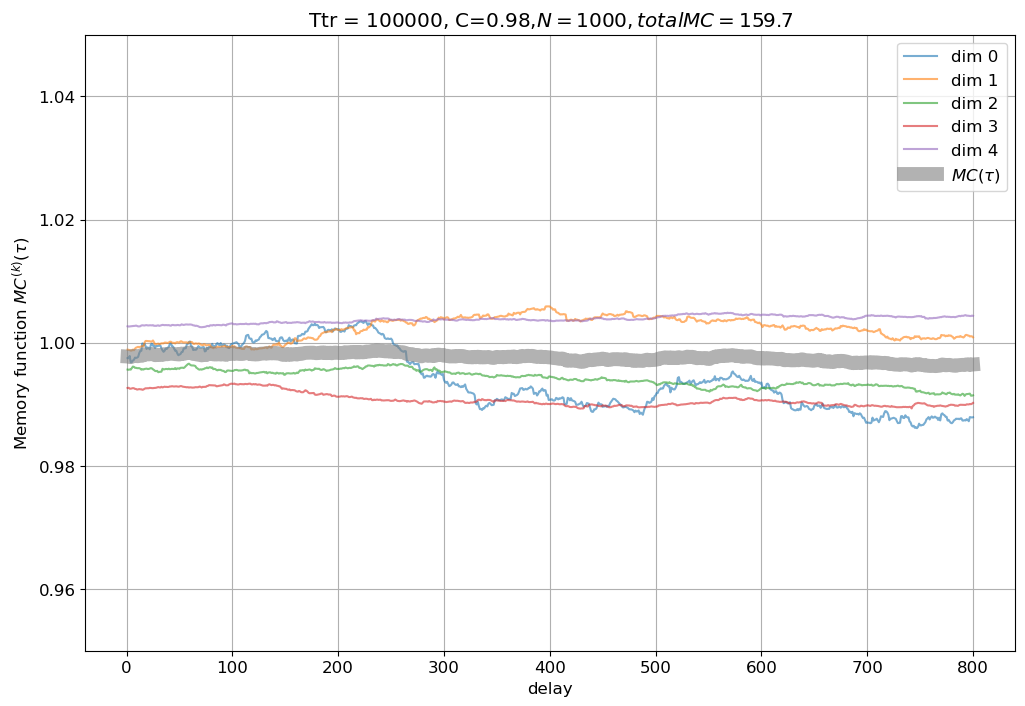

In [42]:
fig,ax = plt.subplots(figsize=(12,8))

tau_st  = 0
tau_end = 800

for d in range(dim):
    plt.plot(taus[tau_st:tau_end],scaled_mfs[d][tau_st:tau_end].cpu().numpy(),alpha=0.6,label="dim "+str(d))

plt.plot(taus[tau_st:tau_end],mc_tau[tau_st:tau_end],alpha=0.6,label=r"$MC(\tau)$",linewidth=10,color="grey")

#plt.ylim(-0.1,1.1)
plt.ylim(0.95,1.05)

plt.xlabel("delay")
plt.ylabel(r'Memory function $MC^{(k)}(\tau)$')
plt.title(r'Ttr = %d, C=%.2f,$N=%d, totalMC=%.1f$'%(Ttrain,C,N_d,totMC))
#
plt.legend()
plt.grid(True)

[0.06748242 0.13279522 0.19908996 0.26288908 0.3358725 ]


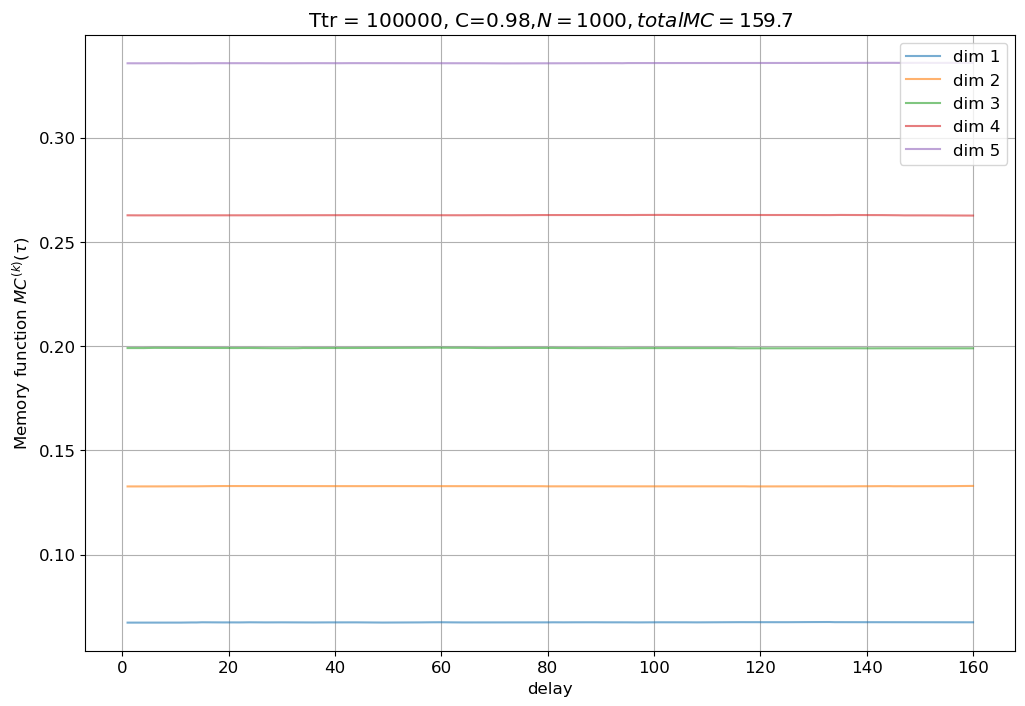

In [41]:
fig,ax = plt.subplots(figsize=(12,8))

tau_st  = 0 
tau_end = 160


for d in range(dim):
    plt.plot(taus[tau_st:tau_end],mfs[d][tau_st:tau_end].cpu().numpy(),alpha=0.6,label="dim "+str(d+1))


print(torch.mean(mfs[:,tau_st:tau_end],1).cpu().numpy())


plt.xlabel("delay")
plt.ylabel(r'Memory function $MC^{(k)}(\tau)$')
plt.title(r'Ttr = %d, C=%.2f,$N=%d, totalMC=%.1f$'%(Ttrain,C,N_d,totMC))
#
plt.legend()
plt.grid(True)